In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel("回帰データ2018.xls",sheet_name="hep12")
data.head(20)

,year,hep,hsp,mhsp,fhsp,oil,dispin_1,tuitio_1,dteiin,kdteiin,...,fts,taikoka,GDP,SEP,EP,EP.1,EP.2,sfad1,sfad2,dgo
0,1963.0,277301.0,987426.0,520231.0,467195.0,0.0,221315.789474,480150.375940,150676.0,51350.0,...,NaN,0.0,22282.7,NaN,NaN,NaN,1770483.0,NaN,NaN,NaN
1,1964.0,278833.0,871534.0,458582.0,412952.0,0.0,214352.478707,564123.170998,162163.0,53140.0,...,58446.0,0.0,26163.4,NaN,NaN,NaN,1401646.0,NaN,NaN,0.656197
2,1965.0,330480.0,1160075.0,597671.0,562404.0,0.0,231044.210526,625600.000000,174722.0,55624.0,...,84339.0,0.0,30301.9,NaN,NaN,NaN,1947657.0,NaN,NaN,0.632405
3,1966.0,401010.0,1556983.0,799917.0,757066.0,0.0,235682.627622,692876.929165,195214.0,60276.0,...,118406.0,0.0,33673.0,NaN,NaN,NaN,2491231.0,NaN,NaN,0.571080
4,1967.0,434010.0,1603122.0,825928.0,777194.0,0.0,243764.749953,715841.917962,209749.0,63931.0,...,118716.0,0.0,39600.4,NaN,NaN,NaN,2426802.0,NaN,NaN,0.578014
5,1968.0,452997.0,1601499.0,821935.0,779564.0,0.0,260586.001085,726659.432085,220425.0,66562.0,...,127560.0,0.0,46333.0,NaN,NaN,NaN,2359558.0,139196.0,NaN,0.575237
6,1969.0,457498.0,1496972.0,768368.0,728604.0,0.0,275727.755872,732281.844677,224613.0,66710.0,...,127805.0,0.0,54792.6,NaN,NaN,NaN,2133508.0,140859.0,NaN,0.588783
7,1970.0,459696.0,1402962.0,714944.0,688018.0,0.0,291959.064327,720838.206628,230473.0,67640.0,...,120776.0,0.0,64890.7,NaN,NaN,NaN,1947237.0,146988.0,NaN,0.618039
8,1971.0,494213.0,1359654.0,683840.0,675814.0,0.0,316198.321892,698602.593440,236657.0,68114.0,...,125212.0,0.0,75152.0,NaN,NaN,NaN,1846787.0,148643.0,NaN,0.659596
9,1972.0,517778.0,1318548.0,660063.0,658485.0,0.0,326970.823799,694671.052632,244674.0,70361.0,...,129262.0,0.0,82806.3,NaN,NaN,NaN,1737458.0,148213.0,NaN,0.682322


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 73 columns):
year        48 non-null float64
hep         48 non-null float64
hsp         48 non-null float64
mhsp        48 non-null float64
fhsp        48 non-null float64
oil         47 non-null float64
dispin_1    47 non-null float64
tuitio_1    47 non-null float64
dteiin      41 non-null float64
kdteiin     41 non-null float64
pdteiin     41 non-null float64
sdteiin     41 non-null float64
tteiin      41 non-null float64
ktteiin     41 non-null float64
ptteiin     41 non-null float64
stteiin     41 non-null float64
teiin       41 non-null float64
kteiin      41 non-null float64
steiin      41 non-null float64
pteiin      41 non-null float64
yokusei     41 non-null float64
yokusei2    41 non-null float64
fhep        48 non-null float64
dep         48 non-null float64
kdep        48 non-null float64
pdep        48 non-null float64
sdep        48 non-null float64
mdep        48 non-null float64
m

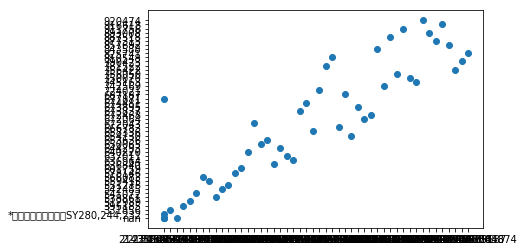

In [4]:
a = data.loc[:,["dispin_1"]] #可処分所得
b = data.loc[:,["ds"]] #大学志願数
plt.scatter(a,b)

In [5]:
df = data.loc[:,["dispin_1","ds"]]

In [6]:
df = df.dropna()

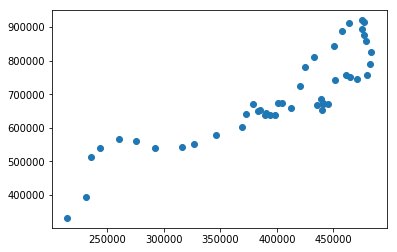

In [7]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [8]:
X = df.iloc[:,0].as_matrix().reshape(-1, 1)
y = df.iloc[:,1].as_matrix().reshape(-1, 1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import learning_curve
lc = learning_curve(lr, X, y)

lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

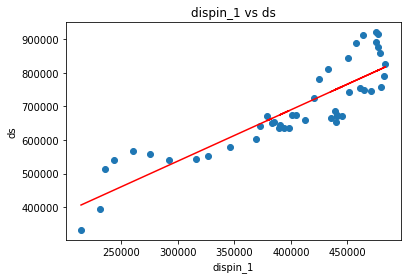

In [9]:
# 散布図に近似直線を重ねてみる
plt.scatter(X, y)                       # 散布図を表示
plt.plot(X, lr.predict(X), color='red') # 回帰直線を表示
plt.title('dispin_1 vs ds')     # グラフのタイトルを表示
plt.xlabel('dispin_1')               # x軸のラベルを表示
plt.ylabel('ds')                  # y軸のラベルを表示
plt.show()                              # 上記の内容でグラフを表示

In [10]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [11]:
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X, y), len(y), 2))
print('test : %3f' % adjusted(lr.score(X, y), len(y), 2))

adjusted R^2
train: 0.768622
test : 0.768622


In [12]:
# 2次関数の変数変換
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)    # 2次の多項式基底を生成
X_quad = quad.fit_transform(X) # 生成した基底関数で変数変換を実行
X_quad

array([[1.00000000e+00, 2.14352479e+05, 4.59469851e+10],
       [1.00000000e+00, 2.31044211e+05, 5.33814272e+10],
       [1.00000000e+00, 2.35682628e+05, 5.55463010e+10],
       [1.00000000e+00, 2.43764750e+05, 5.94212533e+10],
       [1.00000000e+00, 2.60586001e+05, 6.79050640e+10],
       [1.00000000e+00, 2.75727756e+05, 7.60257954e+10],
       [1.00000000e+00, 2.91959064e+05, 8.52400952e+10],
       [1.00000000e+00, 3.16198322e+05, 9.99813788e+10],
       [1.00000000e+00, 3.26970824e+05, 1.06909920e+11],
       [1.00000000e+00, 3.46403281e+05, 1.19995233e+11],
       [1.00000000e+00, 3.69485924e+05, 1.36519848e+11],
       [1.00000000e+00, 3.73038729e+05, 1.39157893e+11],
       [1.00000000e+00, 3.83195235e+05, 1.46838588e+11],
       [1.00000000e+00, 3.79243015e+05, 1.43825264e+11],
       [1.00000000e+00, 3.84923793e+05, 1.48166326e+11],
       [1.00000000e+00, 3.89238966e+05, 1.51506973e+11],
       [1.00000000e+00, 3.98316900e+05, 1.58656353e+11],
       [1.00000000e+00, 3.93672

In [13]:
# 線形回帰のインスタンスを生成
model_quad = LinearRegression()

# 変換後の変数を利用して実行
model_quad.fit(X_quad, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

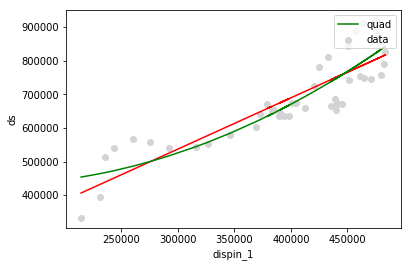

In [14]:
plt.scatter(X, y, color='lightgray', label='data')               # 散布図を表示
plt.plot(X, lr.predict(X), color='red') # 回帰直線を表示
x_quad = quad.fit_transform(X)                                       # プロットのためのxも2変数変換する
plt.plot(X, model_quad.predict(X_quad), color='green', label='quad') # 回帰曲線を表示（2次関数）
plt.xlabel('dispin_1')                                                  # x軸のラベルを表示
plt.ylabel('ds')                                                   # y軸のラベルを表示
plt.legend(loc = 'upper right')                                      # 凡例を表示
plt.show()                                                           # 上記の内容でグラフを表示

In [15]:
print('adjusted R^2')
print('train: %3f' % adjusted(model_quad.score(X_quad, y), len(y), 2))
print('test : %3f' % adjusted(model_quad.score(X_quad, y), len(y), 2))

adjusted R^2
train: 0.789597
test : 0.789597


In [16]:
data2 = data.loc[:,["dispin_1","GDP","ds"]].dropna()
X = data2.loc[:,["dispin_1","GDP"]].as_matrix().reshape(-1, 2)
y = data2.loc[:,["ds"]].as_matrix().reshape(-1, 1)
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [18]:
print('adjusted R^2')
print('%3f' % adjusted(lr.score(X, y), len(y), 2))

adjusted R^2
0.808049


In [20]:
lr.coef_

array([[1.54435383, 0.01748346]])

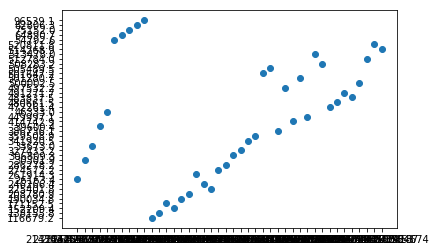

In [22]:
plt.scatter( data2.loc[:,["dispin_1"]], data2.loc[:,["GDP"]])

In [33]:
data2.loc[:,["dispin_1","GDP"]].corr()

,dispin_1,GDP
dispin_1,1.00000,0.93425
GDP,0.93425,1.00000
